In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [6]:
def Model1_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, gamma_1, gamma_2, gamma_3, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_Job = 0 
    
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_Job = 0 
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_Job = 0 
    
    
    
    # Initalise vector to store the time 
    Time_v = []
    
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*4)
    if(lambda_1 > 0):
        EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    else:
        EC[0] = TERM+1
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        #print(EC)
        iteration +=1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        

        # Next event is arrival of a CE
        if(ENEXT==0):
           # print('CE arrival')
            
            # Increase CE arrivals by 1 
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):
                
                
                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        #print('CE matches with job')
                        # CE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE and job matches by 1
                        Matches_CE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                
                        break
                
            # If there are no matches found or possible then CE joins the queue 
            if(m == 0):
              #  print('No match join queue')
                # update EC to inlude abandonment time of that CE 
                EC=np.insert(EC, (4+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_1)))
                
                # Joins queue 
                Q1 += 1
                
                
                
            # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        
        
        # Next event is arrival of a EE
        elif(ENEXT==1):
           # print('EE arrival')
            
            # Increase EE arrivals by 1 
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):

                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                       # print('EE matches with job')
                        # EE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and job matches by 1
                        Matches_EE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                        break
                
            # If there are no matches found or possible then EE joins the queue 
            if(m == 0):
              #  print('No match join queue ')
                # update EC to inlude abandonment time of that EE 
                EC=np.insert(EC, (4+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_2)))
    
                
                # Joins queue 
                Q2 += 1
                
            
                
                
            # Update EC to include next arrival time of EE
            EC[1]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_2)
            
        # Next event is arrival of job 
        elif(ENEXT == 2):
          #  print('Job arrival')
            
            # Initialise matches to be 0 
            m = 0 
            
            # Increase arrivals by 1
            Arrivals_Job += 1
            
            # CE > EE so first check if there are matches with CE
            if(Q1 > 0):
                
                # Loop through each CE and check for a match
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-r (probability of matching) then a match is found
                    if(u < (1-r1)):
                        
                        # Job Matches and leaves the system with the CE
                       # print('Job Matches with CE')
                        m += 1 
                        Q1 -= 1
                        
                        # Increase matches of job and CE by 1 
                        Matches_Job += 1
                        Matches_CE += 1 
                        
                        # Update event calender to remove abandonment time of the CE 
                        EC = np.delete(EC, (4+i))
                        break 
                        
            # If job didnt match with CE and there are EEs check for match
            if(Q2 > 0 and m == 0):
                
                # Loop through each EE and check for a match 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-2 (probability of matching) then a match is found
                    if(u < (1-r2)):
                      #  print('Job matches with EE')
                        # Job Matches and leaves the system with the EE
                        
                        m += 1 
                        Q2 -= 1
                        
                        # Increase matches of job and EE by 1 
                        Matches_Job += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the EE 
                        EC = np.delete(EC, (4+Q1+i))
                        break
            # If no CE or EE to match or no match found, then job joins the job queue  
            if(m == 0):
             #   print('No match join queue')
                # Update EC to include abandonment time of the job
                EC = np.insert(EC, (4+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_3)))
                # Job joinss job queue 
                Q3 += 1 
                
            # Update event calander to include next arrival of job 
            EC[2]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is abandonment of CE
        elif((ENEXT>3) and (ENEXT<=(3+Q1))):
          #  print('CE abandonment')
            # Q1 decreases by 1 
            Q1 -= 1
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        # If next event is an abandonment of EE (Q2)
        elif((ENEXT>(3+Q1)) and (ENEXT<=(3+Q1+Q2))):
          #   print('EE abandonment')
            # Q2 decreases by 1 
             Q2 -= 1
            # Abandonment Increases by 1
             Abandonment_EE += 1
            # Remove abandonment time from event calendar 
             EC = np.delete(EC, ENEXT)
            #print('Q2 abandonment')
            #print(EC)
        
        # Next event is abandonment of Job (Q3)
        elif((ENEXT>(3+Q1+Q2)) and (ENEXT<=(3+Q1+Q2+Q3))):
            # Q3 decreases by 1
            Q3 -= 1
             # Abandonment increases by 1
            Abandonment_Job += 1
             # Remove abandonment time from event calendar
            EC = np.delete(EC, ENEXT)
             
        
             
    T_Q = AQ1+AQ2+AQ3  
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_Job > 0):
        JobMatchRate = Matches_Job/Arrivals_Job
        JobAbandonRate = Abandonment_Job/Arrivals_Job
    else:
        JobMatchRate = 0
        JobAbandonRate = 0 
    if(Arrivals_CE +Arrivals_EE+Arrivals_Job > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    
    
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_Total= T_Q/TERM
    

    
    return Av_AQ1, Av_AQ2, Av_AQ3, CEMatchRate, EEMatchRate, JobMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JobAbandonRate, TotalAbandonRate , Av_Total



             
             

        
        
                
                        
            
                
                
        

In [8]:
print(datetime. now())

lambda_1 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]


CE_Match_rates = []
EE_Match_rates = []
Job_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
Job_Abandon_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
Job_Queue_length = []
Total_Queue_length = []



for i in range(len(lambda_1)):
    Lambda_1 = lambda_1[i]
    print(lambda_1[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    Job_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    Job_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    Job_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(2):
        print(j)
        print(datetime. now())
        rep_results=Job_sim(0.75, 0.5, lambda_1[i], 1, 1, 0.1, 0.1, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[3])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[4])
        Job_Rep_m_rate = np.append(Job_Rep_m_rate, rep_results[5])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[6])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[7])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[8])
        Job_Rep_a_rate = np.append(Job_Rep_a_rate, rep_results[9])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[10])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        Job_Rep_q_length = np.append(Job_Rep_q_length, rep_results[2])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[11])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    Job_Match_rates = np.append(Job_Match_rates, np.average(Job_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    Job_Abandon_rates = np.append(Job_Abandon_rates, np.average(Job_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    Job_Queue_length = np.append(Job_Queue_length, np.average(Job_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(Job_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(Job_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(Job_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-23 15:27:51.030150
0
0
0
2023-08-23 15:27:51.031651
1
2023-08-23 15:27:57.918346
[0.]
[0.88082009]
[0.8747028]
[0.87775005]
[0.]
[0.11917991]
[0.12521414]
[0.12220828]
[0.]
[1.2135637]
[2.48311951]
[3.69668321]
0.2
1
0
2023-08-23 15:28:04.611524
1
2023-08-23 15:28:13.160518
[0.         0.91420425]
[0.88082009 0.76045365]
[0.8747028  0.94747451]
[0.87775005 0.85909866]
[0.         0.08579575]
[0.11917991 0.2395298 ]
[0.12521414 0.05249206]
[0.12220828 0.14087856]
[0.         0.17084887]
[1.2135637  2.38229357]
[2.48311951 1.0672256 ]
[3.69668321 3.62036804]
0.4
2
0
2023-08-23 15:28:20.479433
1
2023-08-23 15:28:29.046251
[0.         0.91420425 0.87688453]
[0.88082009 0.76045365 0.63285879]
[0.8747028  0.94747451 0.97620745]
[0.87775005 0.85909866 0.81690152]
[0.         0.08579575 0.12303155]
[0.11917991 0.2395298  0.36705721]
[0.12521414 0.05249206 0.0237759 ]
[0.12220828 0.14087856 0.18304289]
[0.         0.17084887 0.48101459]
[1.2135637  2.38229357 3.69540327]
[2.48311951 1.0

1
2023-08-23 15:32:36.313309
[0.         0.91420425 0.87688453 0.83680911 0.79756397 0.75487811
 0.70548184 0.6507166  0.59639078 0.54465621 0.4981679 ]
[0.88082009 0.76045365 0.63285879 0.47859519 0.35344824 0.24263133
 0.1527612  0.08597159 0.04206199 0.01992081 0.00978127]
[0.8747028  0.94747451 0.97620745 0.99156943 0.99708478 0.99909899
 0.99956981 0.99975034 0.99994982 1.         0.9999834 ]
[0.87775005 0.85909866 0.81690152 0.75703895 0.71000045 0.66607718
 0.62421766 0.58837472 0.5530166  0.52522205 0.50286076]
[0.         0.08579575 0.12303155 0.16316314 0.20229051 0.24500555
 0.29451816 0.34924787 0.40349439 0.45525084 0.50168181]
[0.11917991 0.2395298  0.36705721 0.52132205 0.64625085 0.75711732
 0.84710617 0.91369223 0.95762326 0.9796982  0.98990016]
[1.25214139e-01 5.24920625e-02 2.37758960e-02 8.43057289e-03
 2.91522266e-03 9.01007494e-04 4.30193017e-04 2.49663766e-04
 5.01802046e-05 0.00000000e+00 1.66035731e-05]
[0.12220828 0.14087856 0.18304289 0.24292259 0.28985037 0.

In [10]:
# Results

lambda_1 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]


CE_Match_rates = [0.0, 0.91420425, 0.87688453, 0.83680911, 0.79756397, 0.75487811, 0.70548184, 0.6507166, 0.59639078, 0.54465621, 0.4981679, 0.45493688, 0.41544354]
EE_Match_rates = [0.88082009, 0.76045365, 0.63285879, 0.47859519, 0.35344824, 0.24263133, 0.1527612, 0.08597159, 0.04206199, 0.01992081, 0.00978127, 0.00310649, 0.00093375]
Job_Match_rates = [0.8747028, 0.94747451, 0.97620745, 0.99156943, 0.99708478, 0.99909899, 0.99956981, 0.99975034, 0.99994982, 1.0, 0.9999834, 1.0, 1.0]
Total_Match_rates = [0.87775005, 0.85909866, 0.81690152, 0.75703895, 0.71000045, 0.66607718, 0.62421766, 0.58837472, 0.5530166, 0.52522205, 0.50286076, 0.47774272, 0.4538127]
CE_Abandon_rates = [0.0, 0.08579575, 0.12303155, 0.16316314, 0.20229051, 0.24500555, 0.29451816, 0.34924787, 0.40349439, 0.45525084, 0.50168181, 0.54495703, 0.58440366]
EE_Abandon_rates = [0.11917991, 0.2395298, 0.36705721, 0.52132205, 0.64625085, 0.75711732, 0.84710617, 0.91369223, 0.95762326, 0.9796982, 0.98990016, 0.99664309, 0.99876629]
Job_Abandon_rates = [0.125214139, 0.0524920625, 0.023775896, 0.00843057289, 0.00291522266, 0.000901007494, 0.000430193017, 0.000249663766, 5.01802046e-05, 0.0, 1.66035731e-05, 0.0, 0.0]
Total_Abandon_rates = [0.12220828, 0.14087856, 0.18304289, 0.24292259, 0.28985037, 0.33380046, 0.37574086, 0.4115125, 0.44684444, 0.47463317, 0.49698482, 0.52214224, 0.54603568]
CE_Queue_length = [0.0, 0.17084887, 0.48101459, 0.97986894, 1.64123625, 2.45864292, 3.54648108, 4.95313835, 6.43605338, 8.1788343, 9.99855488, 12.00678266, 14.05429039]
EE_Queue_length = [1.2135637, 2.38229357, 3.69540327, 5.23586616, 6.4009299, 7.53575353, 8.5056376, 9.02096255, 9.64583834, 9.85562343, 9.83263884, 9.97449333, 9.95636341]
Job_Queue_length = [2.48311951, 1.0672256, 0.486832652, 0.166885465, 0.0639734989, 0.0232246563, 0.00796040715, 0.00349734723, 0.000800855497, 0.000208792919, 0.000109507125, 4.24779494e-06, 1.98459358e-05]
Total_Queue_length = [3.69668321, 3.62036804, 4.66325051, 6.38262057, 8.10613966, 10.0176211, 12.06007909, 13.97759824, 16.08269257, 18.03466652, 19.83130323, 21.98128024, 24.01067365]


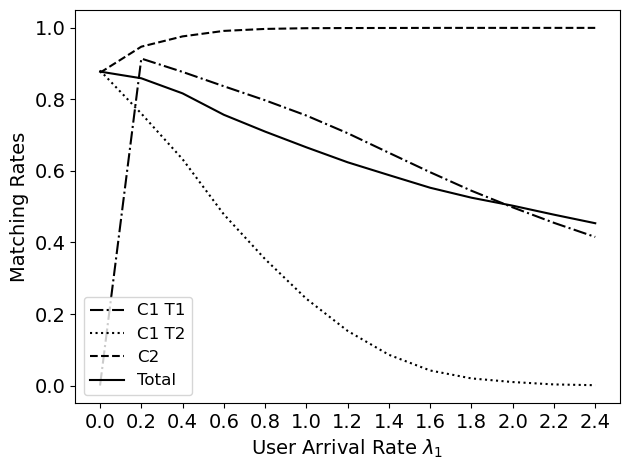

In [18]:
plt.xlabel(r'User Arrival Rate $\lambda_1$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(lambda_1, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda_1, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda_1, Job_Match_rates, linestyle='dashed', label = 'C2', color='black')
plt.plot(lambda_1, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda_1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp6_Match.png')
plt.show()




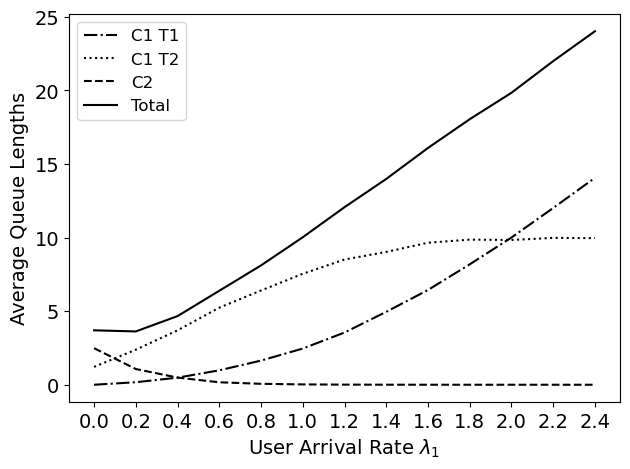

In [19]:
plt.xlabel(r'User Arrival Rate $\lambda_1$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(lambda_1, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda_1, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda_1, Job_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(lambda_1, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda_1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp6_Queue.png')
plt.show()



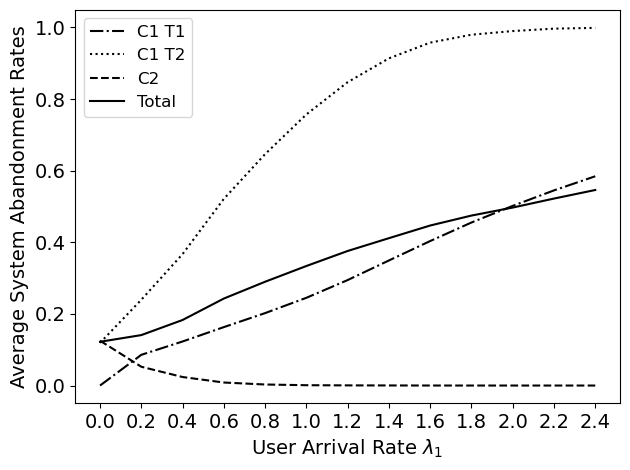

In [20]:
plt.xlabel(r'User Arrival Rate $\lambda_1$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(lambda_1, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda_1, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda_1, Job_Abandon_rates, linestyle='dashed', label = 'C2', color='black')
plt.plot(lambda_1, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda_1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp6_Abandon.png')
plt.show()

